In [14]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
%matplotlib inline 

In [35]:
df_lyrics = pd.read_csv('lyrics.csv', index_col='index')
df_lyrics.head()

,song,year,artist,genre,lyrics
index,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [16]:
df_lyrics.shape

(362237, 6)

## Remove Null values

In [36]:
df_lyrics.isnull().sum()

song          2
year          0
artist        0
genre         0
lyrics    95680
dtype: int64

In [37]:
df_lyrics = df_lyrics.dropna(axis=0)
df_lyrics.isnull().sum()

song      0
year      0
artist    0
genre     0
lyrics    0
dtype: int64

In [19]:
df_lyrics.shape

(266556, 6)

In [38]:
df_lyrics.describe(include='all')

,song,year,artist,genre,lyrics
count,266556,266556.000000,266556,266556,266556
unique,187186,NaN,14543,12,244873
top,intro,NaN,dolly-parton,Rock,INSTRUMENTAL
freq,190,NaN,744,109235,1369
mean,NaN,2007.654909,NaN,NaN,NaN
std,NaN,10.115249,NaN,NaN,NaN
min,NaN,67.000000,NaN,NaN,NaN
25%,NaN,2006.000000,NaN,NaN,NaN
50%,NaN,2007.000000,NaN,NaN,NaN
75%,NaN,2010.000000,NaN,NaN,NaN


## Replace new line in lyrics

In [39]:
df_lyrics['lyrics'] = df_lyrics.apply(lambda x: x['lyrics'].replace('\n',' '), axis=1)
df_lyrics.head()

,song,year,artist,genre,lyrics
index,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing? You know I'm gonna cut..."
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy, it's like you seem..."
2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I [Verse 1:] If I wrote a..."
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


## Remove rows with short lyrics

**count number of letters**

In [40]:
df_lyrics['lyrics-length'] = df_lyrics['lyrics'].str.len()
df_lyrics.describe()

,year,lyrics-length
count,266556.000000,266556.000000
mean,2007.654909,1146.469785
std,10.115249,800.034632
min,67.000000,1.000000
25%,2006.000000,658.000000
50%,2007.000000,967.000000
75%,2010.000000,1398.000000
max,2016.000000,42132.000000


In [41]:
#df_lyrics[df_lyrics['lyrics-length'] < 100].head(20)
(df_lyrics['lyrics-length'] < 100).sum()

7069

In [42]:
df_lyrics = df_lyrics[df_lyrics['lyrics-length'] > 100]
df_lyrics.describe()

,year,lyrics-length
count,259461.000000,259461.000000
mean,2007.670324,1176.996662
std,10.224192,789.004349
min,67.000000,101.000000
25%,2006.000000,682.000000
50%,2007.000000,985.000000
75%,2010.000000,1415.000000
max,2016.000000,42132.000000


In [43]:
#df_lyrics[df_lyrics['lyrics-length'] < 110].head(20)
#df_lyrics[df_lyrics['lyrics'].str.contains('We are not in a position to display')].shape
df_lyrics = df_lyrics[~df_lyrics['lyrics'].str.contains('We are not in a position to display')]
df_lyrics.describe(include='all')

,song,year,artist,genre,lyrics,lyrics-length
count,259431,259431.000000,259431,259431,259431,259431.000000
unique,181642,NaN,14439,12,241739,NaN
top,intro,NaN,dolly-parton,Rock,[** feat. Philip Lawrence:] Her Heart Is Racin...,NaN
freq,139,NaN,744,106465,57,NaN
mean,NaN,2007.670517,NaN,NaN,NaN,1177.120279
std,NaN,10.224543,NaN,NaN,NaN,788.966216
min,NaN,67.000000,NaN,NaN,NaN,101.000000
25%,NaN,2006.000000,NaN,NaN,NaN,682.000000
50%,NaN,2007.000000,NaN,NaN,NaN,985.000000
75%,NaN,2010.000000,NaN,NaN,NaN,1415.000000


In [44]:
df_lyrics[df_lyrics['lyrics-length'] < 110].head(20)

,song,year,artist,genre,lyrics,lyrics-length
index,,,,,,
3495,this-place-i-call-home,2007,george-duke,Jazz,Thoughts that I can't erase Brought from a dis...,104
5315,flower,2012,deerhoof,Rock,"Flower, flower, flower Power, power, power I c...",106
5592,initiation-sequence,2007,eleventy-seven,Rock,"Good evening, welcome to galactic time conques...",102
5843,a-waste-land,2008,bryan-ferry,Rock,When love's gone There's no one A waste land A...,105
6726,follow-me,2007,funker-vogt,Electronic,An open door an invitation To join in this new...,103
7551,diableria,2007,behemoth,Metal,Dominus Sathanas Pan Deamonium Capricornus Dom...,109
7950,for-the-babies,2008,angel-grant,Pop,"I see you, I see love Sent from Heaven above O...",109
8791,remain-calm,2012,50-cent,Hip-Hop,50 Cent Ft. Snoop Dogg & Precious Paris - Rema...,107
9198,iadaaicediaea,2006,adaaeaaineay-iaidiia,Rock,", , , . , """" , , . , , , . , , , . .: , , . , ...",105


## Remove remixes

In [52]:
df_lyrics[df_lyrics['song'].str.contains('remix', flags=re.IGNORECASE, regex=True)].head()

,song,year,artist,genre,lyrics,lyrics-length
index,,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing? You know I'm gonna cut...",1961
22,beutiful-liar-remix,2007,beyonce-knowles,Pop,Ay! Ay! (Nobody likes being played) Ay! Oh! Be...,1655
49,irreemplazable-nortena-remix,2007,beyonce-knowles,Pop,"Ya lo ves, ya lo ves Te olvid, te olvid, mmm Y...",1953
88,run-the-world-girls-remix,2012,beyonce-knowles,Pop,"Girls, we run this motha Girls, we run this mo...",2694
111,in-da-club-remix,2006,beyonce-knowles,Pop,"No shorty, it's Beyonce We gon' party like, it...",2397


In [53]:
df_lyrics = df_lyrics[~df_lyrics['song'].str.contains('remix', flags=re.IGNORECASE, regex=True)]
df_lyrics.describe(include='all')

,song,year,artist,genre,lyrics,lyrics-length
count,257342,257342.000000,257342,257342,257342,257342.000000
unique,179639,NaN,14402,12,241147,NaN
top,intro,NaN,dolly-parton,Rock,[** feat. Philip Lawrence:] Her Heart Is Racin...,NaN
freq,139,NaN,744,106225,57,NaN
mean,NaN,2007.672463,NaN,NaN,NaN,1170.460442
std,NaN,7.956415,NaN,NaN,NaN,782.457699
min,NaN,67.000000,NaN,NaN,NaN,101.000000
25%,NaN,2006.000000,NaN,NaN,NaN,681.000000
50%,NaN,2007.000000,NaN,NaN,NaN,981.000000
75%,NaN,2010.000000,NaN,NaN,NaN,1407.000000


## Fix years

In [54]:
df_lyrics[df_lyrics['year'] < 1900].head(10)

,song,year,artist,genre,lyrics,lyrics-length
index,,,,,,
27657,star,702,clipse,Hip-Hop,You're my star It's such a wonder how you shin...,1322
315540,let-s-lurk,67,giggs,Hip-Hop,Verse 1: Still pulling up on smoke Skeng in my...,463
335205,i-can-t-believe,112,faith-evans,Pop,[Chorus] I can't believe that love has gone aw...,1133


In [55]:
df_lyrics.at[27657, 'artist'] = '702'
df_lyrics.at[27657, 'year'] = 2003

df_lyrics.at[315540, 'artist'] = 67
df_lyrics.at[315540, 'year'] = 2016

df_lyrics.at[335205, 'year'] = 2001

df_lyrics.describe(include='all')

,song,year,artist,genre,lyrics,lyrics-length
count,257342,257342.000000,257342,257342,257342,257342.000000
unique,179639,NaN,14403,12,241147,NaN
top,intro,NaN,dolly-parton,Rock,[** feat. Philip Lawrence:] Her Heart Is Racin...,NaN
freq,139,NaN,744,106225,57,NaN
mean,NaN,2007.692433,NaN,NaN,NaN,1170.460442
std,NaN,5.299125,NaN,NaN,NaN,782.457699
min,NaN,1968.000000,NaN,NaN,NaN,101.000000
25%,NaN,2006.000000,NaN,NaN,NaN,681.000000
50%,NaN,2007.000000,NaN,NaN,NaN,981.000000
75%,NaN,2010.000000,NaN,NaN,NaN,1407.000000


## Graphs

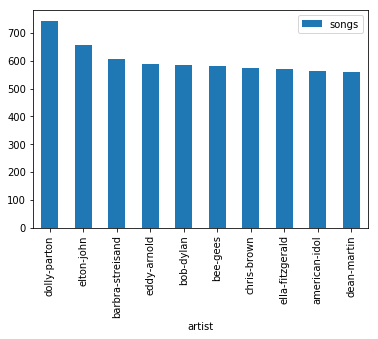

In [59]:
df_top_artists = df_lyrics.groupby('artist').size().sort_values(ascending=False).reset_index(name='songs').head(10)
df_top_artists.plot(x='artist', y='songs', kind='bar')

plt.show()

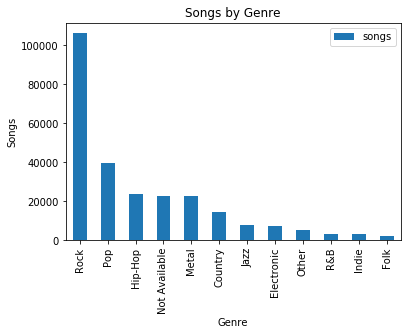

In [60]:
df_genre_count = df_lyrics.groupby('genre').size().sort_values(ascending=False).reset_index(name='songs')
df_genre_count.plot(x='genre', y='songs', kind='bar')

plt.title('Songs by Genre')
plt.xlabel('Genre')
plt.ylabel('Songs')
plt.show()